# **Proyecto 2 – Parte I (Core)**

# **Clasificación basada en arboles**

### **Proyecto 2: Análisis Inicial y Selección de Problema**

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.

# Parte I: Búsqueda y Análisis de Conjuntos de Datos

### **1. Búsqueda de Conjuntos de Datos:**
- Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
- Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

Datasets seleccionados::

Prediccion de Cancer:

https://www.kaggle.com/code/anandhuh/breast-cancer-prediction-accuracy-98-24/input


Ataque al corazon:

https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?resource=download


Banco: Prestamo Personal:

https://www.kaggle.com/code/mahnazarjmand/personal-loan-eda-and-predict/input


prediccion de Lluvias:

https://www.kaggle.com/code/karnikakapoor/rain-prediction-ann



### **Análisis Exploratorio de Datos (EDA) Inicial:**
- Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
- Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
- Documentar los hallazgos de cada EDA en un notebook de Jupyter.


In [ ]:
# Importamos las librerias necesarias para analizar los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Analisis EDA - Cancer

In [ ]:
# cargamos y mostramos el set de datos
df_cancer = pd.read_csv("data.csv")
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Revisamos los diferentes diagnisticos
df_cancer["diagnosis"].unique()

array(['M', 'B'], dtype=object)

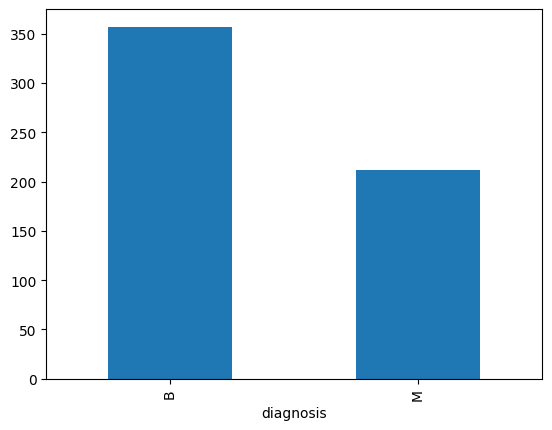

In [ ]:
# Graficamos los diferentes diagnosticos
df_cancer["diagnosis"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
# Revisaos la estructura del Dataframe y podemos observar sus tipos de datos
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Obtenemos una estadistica de los datos
df_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
# Validamos existencia de valores nulos
df_cancer.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


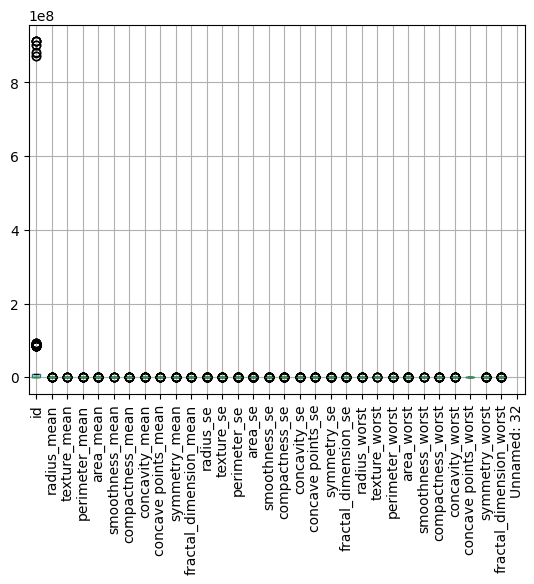

In [ ]:
# Graficamos bloxpot para buscar volores atipicos
df_cancer.boxplot(column=df_cancer.select_dtypes(include=np.number).columns.tolist())
plt.xticks(rotation=90)
plt.show()

la columna 'id' tiene valores atipicos, pero no se considera para un analisis por lo que no sera necesario hacer cambios

Analisis EDA - Ataque al Corazon

In [ ]:
# Cargamos el dataset en un Dataframe y luego miramos los primeros 5 registros
df_heart=pd.read_csv("heart.csv")
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,NaN,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Vemos la estructura del Dataframe y podemos observar sus tipos de datos
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       298 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df_heart.isna().sum()

,0
age,1
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


la columna 'age' tiene un valor nulo

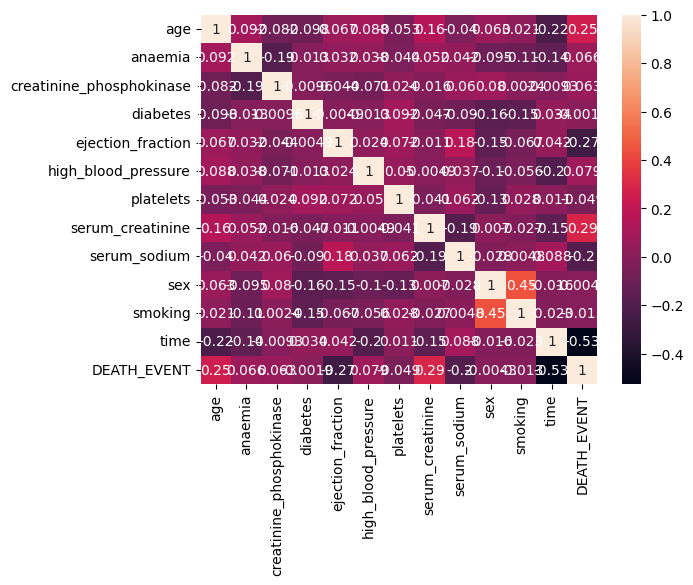

In [ ]:
# Grafiremos un Mapa de Calor para buscar correlaciones
sns.heatmap(df_heart.corr(), annot=True)
plt.show()

El grafico muestra que no existen correspondencia fuerte entre las variables.

Personalmente, tenderia a pensar que la edad podria ser un factor preponderante con esta enfermedad, por no se ve en el mapa

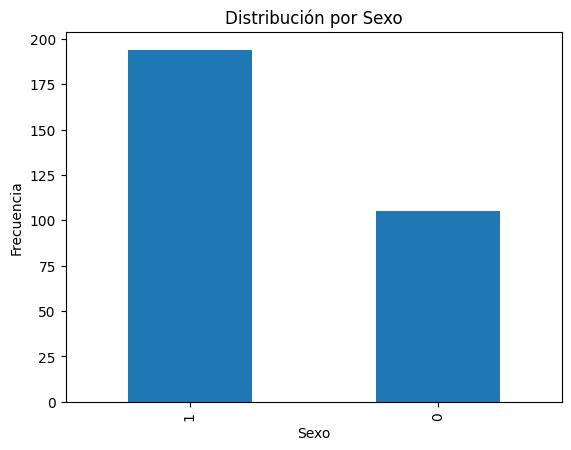

In [ ]:
# Hacemos un grafico para ver distribucion por sexo
df_heart['sex'].value_counts().plot(kind='bar')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

La gran mayoria de los pacientes son hombres

In [ ]:
# obtengo estadistica de variables numericas
df_heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,298.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.786356,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.886333,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


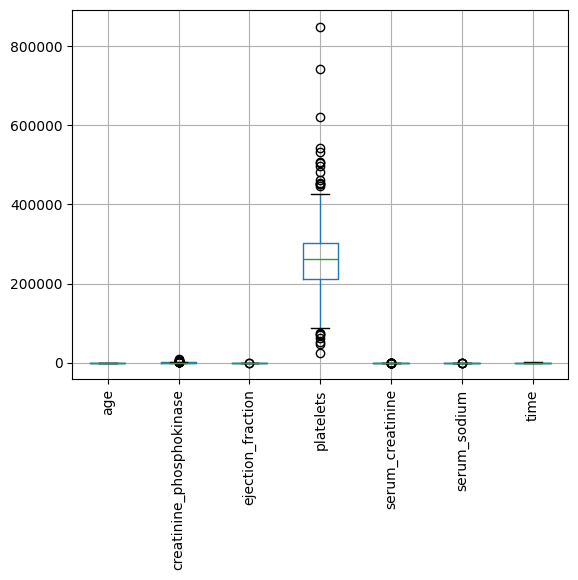

In [ ]:
# Boxplot para analizar las columnas
df_heart.boxplot(column=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'])
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.show()

La columna 'platelets' presenta muchos datos outliers.

Analisis EDA - Lluvias

In [ ]:
# Cargamos el dataset en un Dataframe y luego miramos los primeros 5 registros
df_weather=pd.read_csv("weatherAUS.csv")
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Vemos la estructura del Dataframe y podemos observar sus tipos de datos
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Miramos cantidad dde filas y columnas
df_weather.shape

(145460, 23)

In [ ]:
# Buscamos valores nulos
df_weather.isna().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


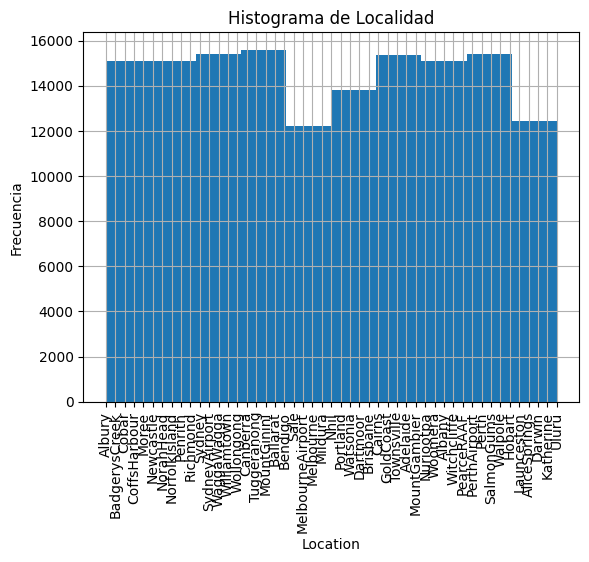

In [ ]:
# Hacemos un histograma de age para ver la distribucion de los pacientes por edad
df_weather['Location'].hist()
plt.title('Histograma de Localidad')
plt.xlabel('Location')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90) # Rota las leyendas de eje x
plt.show()

Podemos apreciar que existen muchas localidades y todas con alta frecuencia

In [ ]:
# obtengo estadistica de variables numericas
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


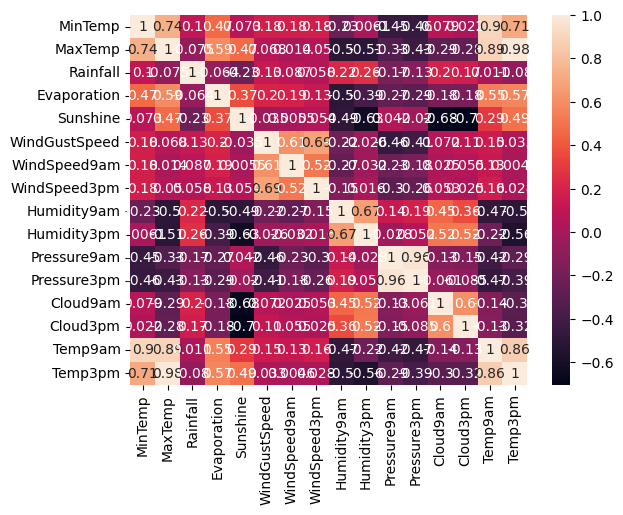

In [ ]:
# Graficaremos un Mapa de Calor para buscar correlaciones en variable numericas
sns.heatmap(df_weather.corr(numeric_only=True), annot=True)
plt.show()

Vemos en el grafico que existe una maxima correlacion de un 98% entre las columnas Max Temp y la Temp 3pm.


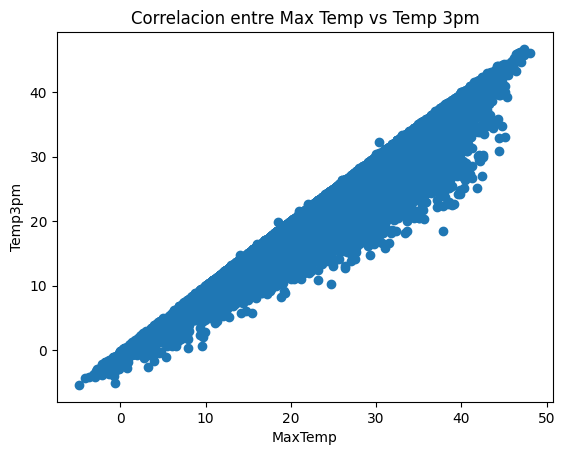

In [ ]:
# Grafico scatter entre Max Temp y Temp 3pm
plt.scatter(df_weather['MaxTemp'], df_weather['Temp3pm'])
plt.title('Correlacion entre Max Temp vs Temp 3pm')
plt.xlabel('MaxTemp')
plt.ylabel('Temp3pm')
plt.show()

Se puede apreciar en el grafico que existe una relacion casi lineal

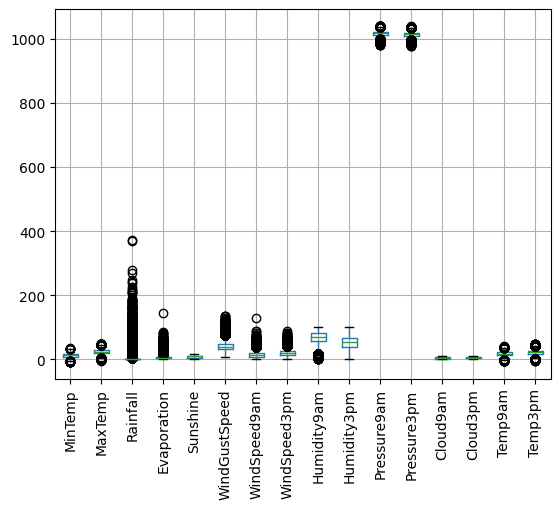

In [ ]:
# Boxplot para analizar todas las columnas numericas del dataframe
df_weather.boxplot(column=df_weather.select_dtypes(include=np.number).columns.tolist())
plt.xticks(rotation=90)
plt.show()

Se puede ver en el grafico que existen varias columnas con datos atipicos. De todas, la mas llamativa es Rainfall, la que revisaremos

Analisis EDA - Bank Personal Loan

In [ ]:
# Cargamos el dataset en un Dataframe y luego miramos los primeros 5 registros
df_bank=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25.0,1,49.0,91107,4.0,1.6,1.0,0,1.0,0.0,0,0.0,0
1,2,45.0,19,34.0,90089,3.0,1.5,1.0,0,1.0,0.0,0,0.0,0
2,3,39.0,15,11.0,94720,1.0,1.0,1.0,0,0.0,0.0,0,0.0,0
3,4,35.0,9,100.0,94112,1.0,2.7,2.0,0,0.0,0.0,0,0.0,0
4,5,35.0,8,45.0,91330,4.0,1.0,2.0,0,0.0,0.0,0,1.0,0


In [ ]:
# Vemos la estructura del Dataframe y podemos observar sus tipos de datos
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 4998 non-null   float64
 2   Experience          5000 non-null   int64  
 3   Income              4999 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              4999 non-null   float64
 6   CCAvg               5000 non-null   float64
 7   Education           4999 non-null   float64
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  4998 non-null   float64
 10  CD Account          4998 non-null   float64
 11  Online              5000 non-null   int64  
 12  CreditCard          4999 non-null   float64
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 547.0 KB


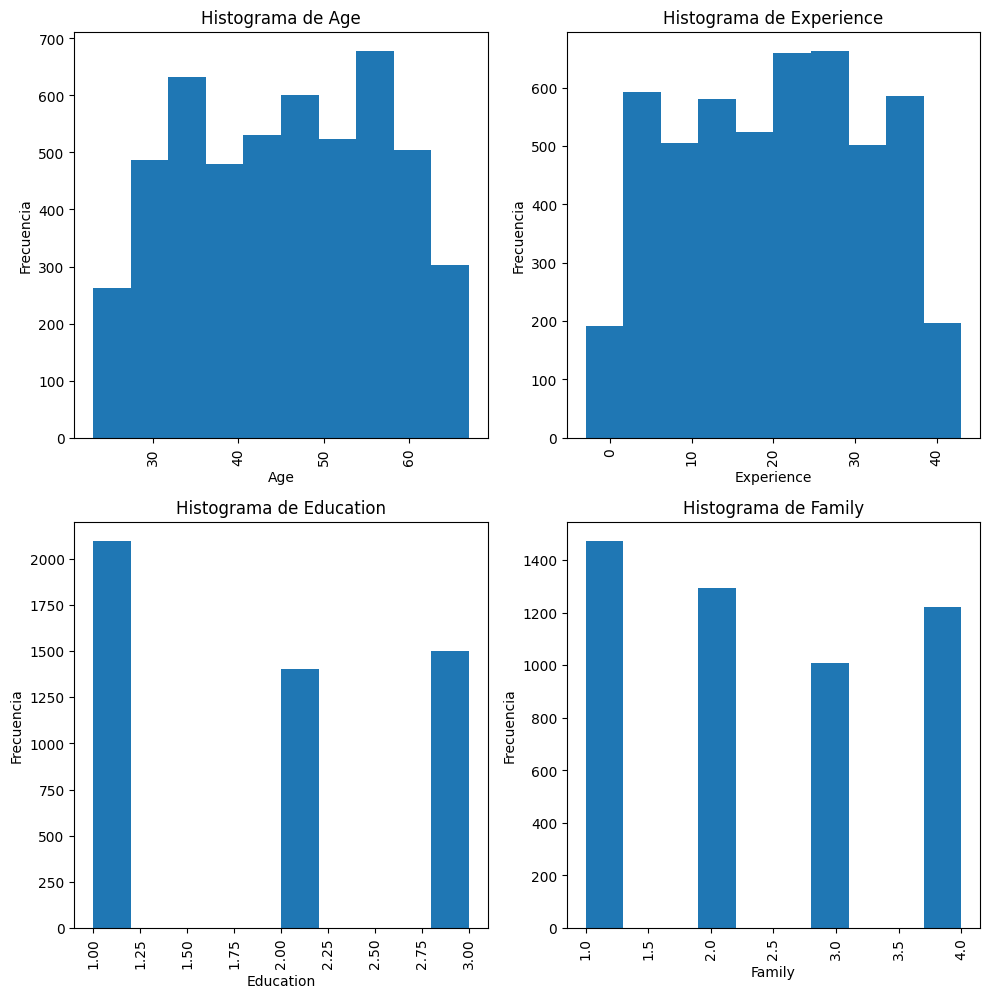

In [ ]:
# subplot para histogramas de las columnas Country, Artist, Album y Genre
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df_bank['Age'])
axs[0, 0].set_title('Histograma de Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].hist(df_bank['Experience'])
axs[0, 1].set_title('Histograma de Experience')
axs[0, 1].set_xlabel('Experience')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].tick_params(axis='x', rotation=90)

axs[1, 0].hist(df_bank['Education'])
axs[1, 0].set_title('Histograma de Education')
axs[1, 0].set_xlabel('Education')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].tick_params(axis='x', rotation=90)

axs[1, 1].hist(df_bank['Family'])
axs[1, 1].set_title('Histograma de Family')
axs[1, 1].set_xlabel('Family')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout() # Ajusta el layout
plt.show()

Se hace un analisis de distribucion de las variables Age, Experience, Education y Family

In [ ]:
# obtengo estadistica de variables numericas
df_bank.describe()

,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Streams Last 30 Days (Millions),Skip Rate (%)
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2020.488000,51.04122,2581.154080,8954.368880,3.520640,99.048500,20.370460
std,1.671959,28.23801,1416.055972,5167.648272,0.571431,57.533452,10.597202
min,2018.000000,1.01000,53.560000,184.300000,2.510000,2.850000,1.160000
25%,2019.000000,27.67250,1337.337500,4322.097500,3.030000,48.057500,11.152500
50%,2020.000000,50.82500,2697.355000,9053.665000,3.540000,101.465000,20.820000
75%,2022.000000,75.09500,3798.197500,12690.180000,4.000000,148.410000,28.760000
max,2023.000000,99.80000,4985.540000,21874.920000,4.490000,200.000000,39.970000


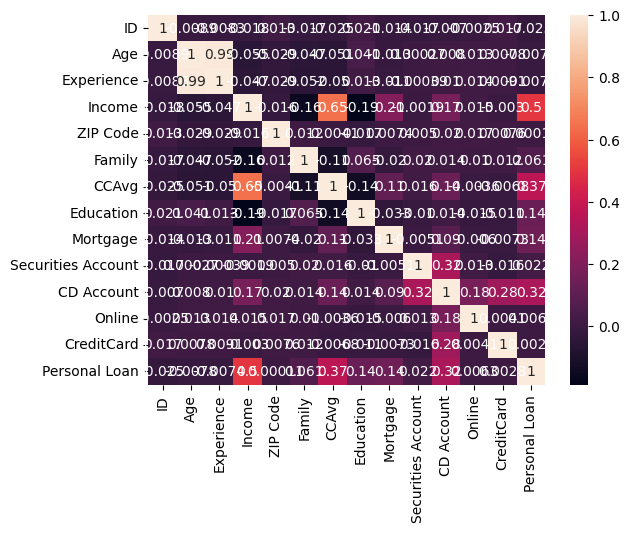

In [ ]:
# Graficaremos un Mapa de Calor para buscar correlaciones en variable numericas
sns.heatmap(df_bank.corr(numeric_only=True), annot=True)
plt.show()

Se puede apreciar una correlacion de un 99% entre las columnas Experience y Age

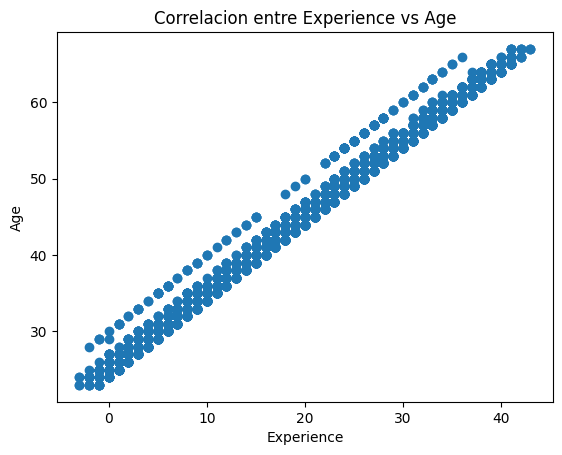

In [ ]:
# Grafico scatter entre Total Streams (Millions) y Total Hours Streamed (Millions)
plt.scatter(df_bank['Experience'], df_bank['Age'])
plt.title('Correlacion entre Experience vs Age')
plt.xlabel('Experience')
plt.ylabel('Age')
plt.show()

Se puede apreciar en el grafico que existe una relacion casi lineal entre las variables

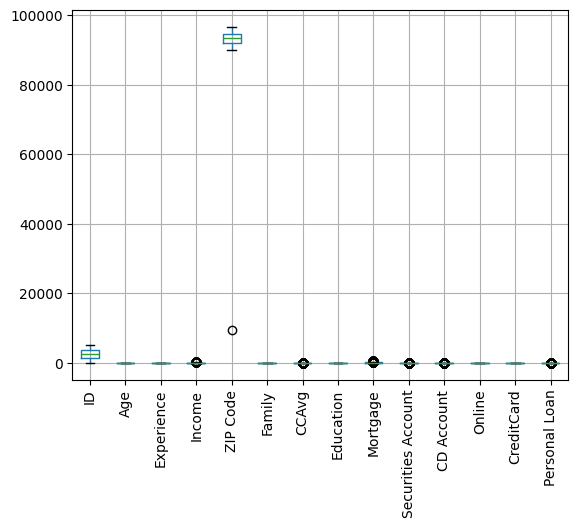

In [ ]:
# Boxplot para analizar todas las columnas numericas del dataframe
df_bank.boxplot(column=df_bank.select_dtypes(include=np.number).columns.tolist())
plt.xticks(rotation=90)
plt.show()

Se puede apreciar que existe valores outliers en la columna Zip Code.  Se graficara por separado.

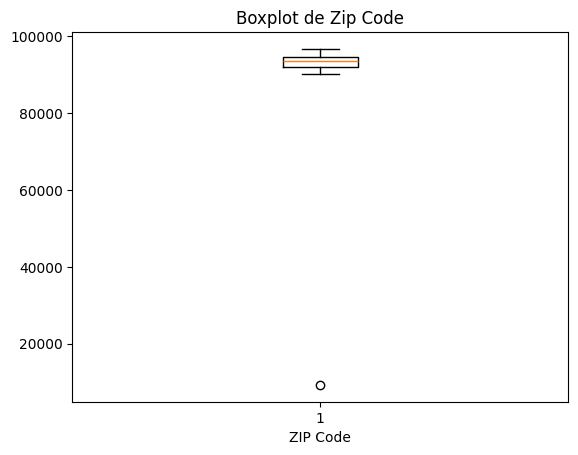

In [ ]:
# boxplot para la columna Streams Last 30 Days (Millions)
plt.boxplot(df_bank['ZIP Code'])
plt.title('Boxplot de Zip Code')
plt.xlabel('ZIP Code')
plt.show()

Se aprecia que la columna ZIP Code presenta un valor outliers que deberia revisarse y ver si es un error y buscar la solucion a ese valor atipico


### **Diagnóstico y Selección de Problema:**

- Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
- Justificar la elección del problema y explicar por qué es relevante y desafiante.

De acuerdo a lo revisado se evidencia la importancia de distintos temas que pueden ser profundizados en el analisis de los datos y de a fin de implementar un modelo predictivo.
A excepción de un dataframe, no se evidencian datos nulos, y tambien se evidencian datos outlier, no obstante al desconocer en profundidad los temas médicos, no se sabe si esto es válido o no.
Se seleccionará el dataframe "HEART", ya que es interesante conocer las predicciones que se pueden realizar en relación a temas médicos rspecto de la probabilidad de enfermedades respecto de los datos de sintomas.
